In [ ]:
import sys
!{sys.executable} -m pip install pycbc ligo-common --no-cache-dir

     |████████████████████████████████| 6.7 MB 4.3 MB/s 
     |████████████████████████████████| 1.4 MB 50.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 46.3 MB 1.2 MB/s 
     |████████████████████████████████| 78 kB 56.3 MB/s 
     |████████████████████████████████| 201 kB 62.7 MB/s 
     |████████████████████████████████| 7.3 MB 36.0 MB/s 
     |████████████████████████████████| 51 kB 46.4 MB/s 
     |████████████████████████████████| 45 kB 40.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 295 kB 55.3 MB/s 
     |████████████████████████████████| 55 kB 39.5 MB/s 
     |████████████████████████████████| 43 kB 26.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata

In [ ]:
import numpy as np
import math
import pylab
import matplotlib.pyplot as plt
import random
import pycbc

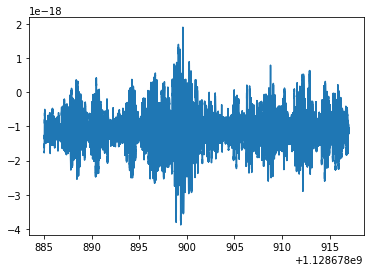

In [ ]:
%matplotlib inline

import pylab
from pycbc.catalog import Merger
from pycbc.filter import resample_to_delta_t, highpass, lowpass

# As an example we use the GW150914 data
merger = Merger("GW151012")

# Get the data from the Livingston detector
strain = merger.strain('L1')
# print(strain.shape)
# strain.start_time = 0
pylab.plot(strain.sample_times, strain)

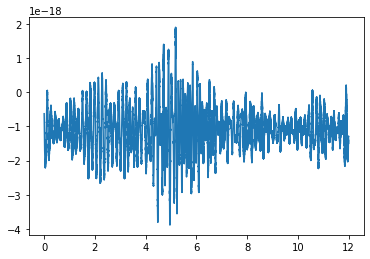

In [ ]:
strain_10s = strain.time_slice(merger.time-6.0, merger.time+6.0)
strain_10s.start_time = 0
pylab.plot(strain_10s.sample_times, strain_10s)

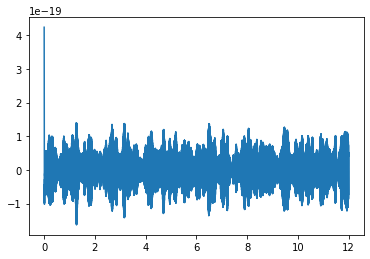

In [ ]:
strain_fil = highpass(strain_10s, 25.0)
pylab.plot(strain_fil.sample_times, strain_fil)

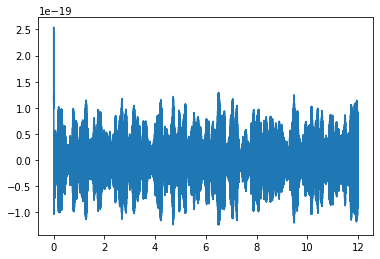

In [ ]:
strain_res = resample_to_delta_t(strain_fil, 1.0/2048)
pylab.plot(strain_res.sample_times, strain_res)

(20480,)


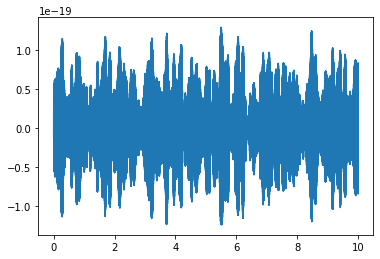

In [ ]:
conditioned = strain_res.crop(1, 1)
conditioned.start_time = 0
pylab.plot(conditioned.sample_times, conditioned)
print(conditioned.shape)

(18432,)


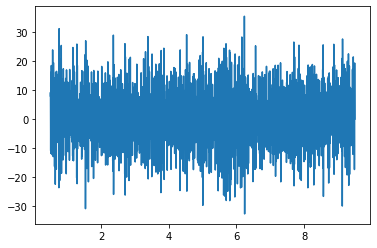

In [ ]:
from pycbc.psd import welch, interpolate
def get_whiten(signal_plus_noise):
    signal_freq_series=signal_plus_noise.to_frequencyseries()
    numerator = signal_freq_series
    psd_to_whiten = interpolate(welch(signal_plus_noise), 1.0 / signal_plus_noise.duration)
    denominator=np.sqrt(psd_to_whiten)
    whiten_freq = (numerator / denominator)
    whiten=whiten_freq.to_timeseries().highpass_fir(30., 512).lowpass_fir(100.0, 512)
    return whiten

whiten_real = get_whiten(conditioned)
pylab.plot(whiten_real.sample_times, whiten_real)
print(whiten_real.shape)

(16384,)


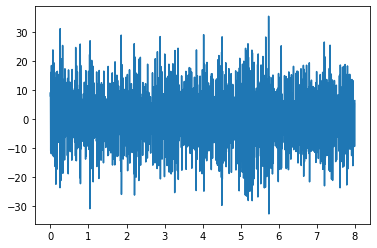

In [ ]:
def get_8s(whiten, signal_peak_index=None):
    whiten.start_time = 0
    cropped = whiten.time_slice(0,8)
    return cropped

real_sig = get_8s(whiten_real)
pylab.plot(real_sig.sample_times, real_sig)
print(real_sig.shape)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
!ls -lt '/content/gdrive/My Drive/' 
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import binary_accuracy, AUC
from sklearn.utils import shuffle
from keras.models import load_model

Mounted at /content/gdrive
total 596513
-rw------- 1 root root    941036 Mar 23 17:51  Mithil_joshi_181060032_NLP_LAB_6.pdf
-rw------- 1 root root 501002212 Mar  6 06:16  VID20220305181136.mp4
drwx------ 2 root root      4096 Mar  2 11:53 'Final Year sem VIII'
drwx------ 2 root root      4096 Mar  2 08:48  NLP_Lab
drwx------ 2 root root      4096 Feb 25 11:00 'FYP NBs'
drwx------ 2 root root      4096 Feb 23 07:42  DAE_GWS_2
-rw------- 1 root root        85 Feb 23 07:35  checkpoint
-rw------- 1 root root      7331 Feb 23 07:35  DAE_GWS_2.ckpt.index
-rw------- 1 root root  17460202 Feb 23 07:35  DAE_GWS_2.ckpt.data-00000-of-00001
-rw------- 1 root root      7337 Feb 22 09:15  DAE_GWS_1.ckpt.index
-rw------- 1 root root  17479973 Feb 22 09:15  DAE_GWS_1.ckpt.data-00000-of-00001
-rw------- 1 root root  31457408 Feb 21 07:11  pure_training_DATA.npy
-rw------- 1 root root  10485888 Feb 21 07:11  negative_training_DATA.npy
-rw------- 1 root root  31457408 Feb 21 07:11  noisy_training_DATA.np

In [ ]:
def model_creation():
  n_timesteps, n_features = 16384, 1
  input_shape=(n_timesteps,n_features)
  model=Sequential()
 
  model.add(Conv1D(filters=8, kernel_size=8, activation='relu'))
  # model.add(Conv1D(8, kernel_size=8, activation='relu'))
  model.add(MaxPooling1D(pool_size=4))
 
  model.add(Conv1D(16, kernel_size=8, activation='relu'))
  # model.add(Conv1D(16, kernel_size=8, activation='relu'))
  model.add(MaxPooling1D(pool_size=4))
 
  model.add(Conv1D(32, kernel_size=8, activation='relu'))
  # model.add(Conv1D(64, kernel_size=8, activation='relu'))
  model.add(MaxPooling1D(pool_size=4))
 
  # model.add(Conv1D(64, kernel_size=8, activation='relu'))
  # model.add(Conv1D(128, kernel_size=8, activation='relu'))
  # model.add(MaxPooling1D(pool_size=4))
 
  model.add(Flatten())
  # model.add(GlobalAveragePooling1D(data_format='channels_last'))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.3))
 
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.3))
 
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.3))

  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.3))
 
  model.add(Dense(1, activation='sigmoid'))
 
  model.compile(optimizer= Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model

In [ ]:
model = model_creation()

In [ ]:
model.load_weights("/content/gdrive/MyDrive/FYP NBs/Re_Classification/Re_BBH_Classification_2.ckpt")

In [ ]:
# model = load_model("/content/gdrive/MyDrive/BBH_Classification_Model_5.h5")
# model.load_weights("/content/gdrive/My Drive/BBH_Classification_5.ckpt")
sample =np.zeros((1,8192*2))
sample[0] = real_sig
sample = sample.reshape(1, 16384,1)
prediction= model.predict(sample)
print(prediction)

[[1.]]


In [ ]:
# model1 = load_model("/content/gdrive/MyDrive/BBH_Classification_Model_2.h5")
# predict1 = model1.predict(sample)
# print(predict1)

[[1.]]


In [ ]:
# model2 = load_model("/content/gdrive/MyDrive/BBH_Classification_Model_3.h5")
# predict2 = model2.predict(sample)
# print(predict2)

[[1.]]


In [ ]:
# segment = (int(merger.time)-5, int(merger.time)+5)
# segment.start_time = 0
# pylab.plot(segment.sample_times, segment)

In [ ]:
# ! pip install -q 'gwpy==1.0.1'
# from gwpy.timeseries import TimeSeries
# ldata = TimeSeries.fetch_open_data('L1', *segment, verbose = True)
# print(ldata)
# ldata.plot()

     |████████████████████████████████| 1.4 MB 27.5 MB/s 


In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive',force_remount=True)
# !ls -lt '/content/gdrive/My Drive/' 
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.layers import Dense, Flatten, MaxPooling1D
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, Dropout
# from tensorflow.keras.optimizers import Adam, RMSprop
# from tensorflow.keras.losses import BinaryCrossentropy
# from tensorflow.keras.metrics import binary_accuracy, AUC
# from sklearn.utils import shuffle
# from keras.models import load_model

Mounted at /content/gdrive
total 6698732
-rw------- 1 root root        143 Jan 20 09:49 'bix-yfhc-hud - Jan 20, 2022.gjam'
-rw------- 1 root root        107 Jan 18 11:04  checkpoint
-rw------- 1 root root   12803838 Jan 16 13:59  BBH_Classification_5.ckpt.data-00000-of-00001
-rw------- 1 root root       3268 Jan 16 13:59  BBH_Classification_5.ckpt.index
-rw------- 1 root root   12868000 Jan 16 13:59  BBH_Classification_Model_5.h5
-rw------- 1 root root    6396921 Jan 15 13:16  BBH_Classification_4.ckpt.data-00000-of-00001
-rw------- 1 root root       4061 Jan 15 13:16  BBH_Classification_4.ckpt.index
-rw------- 1 root root    6478872 Jan 15 13:16  BBH_Classification_Model_4.h5
drwx------ 2 root root       4096 Jan 14 07:25 'FYP NBs'
-rw------- 1 root root    3767216 Jan 13 09:10  BBH_Classification_Model_3.h5
-rw------- 1 root root       3261 Jan 13 09:10  BBH_Classification_3.ckpt.index
-rw------- 1 root root    3701371 Jan 13 09:10  BBH_Classification_3.ckpt.data-00000-of-00001
-rw--